In [ ]:
Notebook to get and clean the data of La Croix newspaper about the covid19 vaccination

In [1]:
from helpers import *

In [2]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\u200b', '', text)
    text = re.sub('\ufeff', '', text)
    text = re.sub("   Abonnés",'',text)
    
#     text = re.sub('\w*\d\w*', '', text)
    return text

# LA CROIX

In [18]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Driver [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45/chromedriver] found in cache


In [19]:
search_url='https://www.la-croix.com/Recherche/vaccination/1/laCroix'

driver.get(search_url)
driver.maximize_window() 
time.sleep(1)
# Aceptar cookkies

In [9]:
# There are 169pages of vacinnes, but just 70 are from Covid: 
list_search_url =[]
list_search_url.append("https://www.la-croix.com/Recherche/vaccination/1/laCroix" )
for i in range(2, 270):
    list_search_url.append(f"https://www.la-croix.com/Recherche/vaccination/{i}/laCroix")

In [12]:
list_links_la_croix=[]
for i in list_search_url: 
    driver.get(i)
    links = driver.find_elements_by_xpath('//div[@class="media-body"]/a')
    for j in links: 
        list_links_la_croix.append(j.get_attribute('href'))

In [13]:
# Store the list in a document
with open("list_links_la_croix.txt", 'w') as f:
    for s in list_links_la_croix:
        f.write(str(s) + '\n')

In [15]:
with open("list_links_la_croix.txt", 'r') as f:
    list_links_croix = [line.rstrip('\n') for line in f]
    list_links_croix= list(set(list_links_croix))
len(list_links_croix)

2680

In [20]:
def get_html_croix(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/LA_CROIX/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [21]:
get_html_croix(list_links_croix)

In [3]:
import os
list_articles_croix=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LA_CROIX/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LA_CROIX/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1").text.strip()
    except: 
        title="error"
    try:
        author=soup.find(class_="meta-author-name").text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find(class_="article-intro").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.time.attrs['datetime']
    except: 
        date="error"
    try:
        tweets = soup.find_all(attrs={"dir" : "ltr"})
        for tweet in tweets:
            tweet.decompose()
    except: 
        pass
    try:
        regex= re.compile('clearfix ap-article-trigger')
        tf=soup.find("div", {"class" : regex}).find_all("p")
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text).strip()
    except: 
        text="error"
    list_articles_croix.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [4]:
import pandas as pd
articles_croix = pd.DataFrame.from_dict(list_articles_croix)

articles_croix

,Title,Subheadline,Text,Authors,Date,Link
0,Vaccination anti-Covid : de la liberté individ...,"Stéphane Madaule, essayiste, invite ses concit...",La vaccination contre le coronavirus est aujou...,"Stéphane Madaule,",2021-07-07T12:32:05+02:00,https://www.la-croix.com/Debats/Vaccination-an...
1,"Covid-19 : en Finlande, le confinement retoqué...","Jugé non conforme à la constitution, le projet...",Le gouvernement de la sociale-démocrate Sanna ...,"Jean-Baptiste François,",2021-04-02T15:56:43+02:00,https://www.la-croix.com/Monde/Covid-19-Finlan...
2,Près de 5 milliards de doses administrées,error,Près de 5 milliards de doses. Selon le site de...,La Croix,2021-08-23T06:00:00+02:00,https://www.la-croix.com/JournalV2/Pres-5-mill...
3,Dans la tête des anti-vaccins,"« Antivax, les marchands de doute », un docume...",Il existe deux freins à la lutte contre la pan...,"Alice Le Dréau,",2021-12-21T06:38:15+01:00,https://www.la-croix.com/Culture/tete-anti-vac...
4,Omicron : un nouveau vaccin anti-Covid pourrai...,Les laboratoires attendent d’en savoir plus su...,Les laboratoires pharmaceutiques font preuve d...,"Jean-Claude Bourbon et Audrey Dufour,",2021-12-02T19:18:03+01:00,https://www.la-croix.com/Sciences-et-ethique/O...
...,...,...,...,...,...,...
2675,Les essentiels de la crise du Covid,error,La barre des trois milliards d’injections de v...,La Croix,2021-06-30T06:00:00+02:00,https://www.la-croix.com/JournalV2/essentiels-...
2676,Bilan de dix ans de saisine citoyenne du Conse...,La procédure de la question prioritaire de con...,Le Conseil constitutionnel célèbre cette année...,"Laurent de Boissieu,",2020-11-13T06:00:00+01:00,https://www.la-croix.com/JournalV2/Bilan-dix-a...
2677,Portugal : les socialistes remportent les muni...,"Fief de la gauche depuis 14 ans, la mairie de ...",Les socialistes du premier ministre Antonio Co...,"La Croix (avec AFP),",2021-09-27T15:31:47+02:00,https://www.la-croix.com/Monde/Portugal-social...
2678,"En Guadeloupe, face au vaccin, la lente prise ...",En réaction au drame qui se joue dans leurs hô...,"Le temps d’une piqûre,Evan, 14 ans, est devenu...","Marion Lecas, à Pointe-à-Pitre (Guadeloupe),",2021-08-26T15:22:15+02:00,https://www.la-croix.com/Sciences-et-ethique/E...


# CLEAN DATASET

In [7]:
# clean text
articles_croix['Text']=articles_croix['Text'].apply(preprocessor)
articles_croix['Title']=articles_croix['Title'].apply(preprocessor)

In [8]:
articles_croix['Newspaper']= 'La Croix'
articles_croix['Country']= 'France'
articles_croix['n_words'] = articles_croix.Text.apply(lambda x: len(str(x).split(' ')))

In [9]:
articles_croix=articles_croix.drop_duplicates()
articles_croix=articles_croix[articles_croix.Text.str.contains("vacc")|articles_croix.Subheadline.str.contains("vacc")|articles_croix.Title.str.contains("vacc")]

In [10]:
import datetime
from datetime import datetime

# DATE
for index,row in articles_croix.iterrows(): 
    try:
        articles_croix['Date'][index] =datetime.strptime(articles_croix['Date'][index][:19], '%Y-%m-%dT%H:%M:%S').date()
    except: 
        continue
articles_croix['Date'] = pd.to_datetime(articles_croix['Date'])

/tmp/ipykernel_267739/577048373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_croix['Date'][index] =datetime.strptime(articles_croix['Date'][index][:19], '%Y-%m-%dT%H:%M:%S').date()


In [11]:
articles_croix

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
0,Vaccination anti-Covid: de la liberté individu...,"Stéphane Madaule, essayiste, invite ses concit...",La vaccination contre le coronavirus est aujou...,"Stéphane Madaule,",2021-07-07,https://www.la-croix.com/Debats/Vaccination-an...,La Croix,France,820
1,"Covid-19: en Finlande, le confinement retoqué ...","Jugé non conforme à la constitution, le projet...",Le gouvernement de la sociale-démocrate Sanna ...,"Jean-Baptiste François,",2021-04-02,https://www.la-croix.com/Monde/Covid-19-Finlan...,La Croix,France,587
2,Près de 5milliards de doses administrées,error,Près de 5 milliards de doses. Selon le site de...,La Croix,2021-08-23,https://www.la-croix.com/JournalV2/Pres-5-mill...,La Croix,France,99
3,Dans la tête des anti-vaccins,"« Antivax, les marchands de doute », un docume...",Il existe deux freins à la lutte contre la pan...,"Alice Le Dréau,",2021-12-21,https://www.la-croix.com/Culture/tete-anti-vac...,La Croix,France,288
4,Omicron: un nouveau vaccin anti-Covid pourrait...,Les laboratoires attendent d’en savoir plus su...,Les laboratoires pharmaceutiques font preuve d...,"Jean-Claude Bourbon et Audrey Dufour,",2021-12-02,https://www.la-croix.com/Sciences-et-ethique/O...,La Croix,France,677
...,...,...,...,...,...,...,...,...,...
2675,Les essentiels de la crise du Covid,error,La barre des trois milliards d’injections de v...,La Croix,2021-06-30,https://www.la-croix.com/JournalV2/essentiels-...,La Croix,France,230
2676,Bilan de dix ans de saisine citoyenne du Conse...,La procédure de la question prioritaire de con...,Le Conseil constitutionnel célèbre cette année...,"Laurent de Boissieu,",2020-11-13,https://www.la-croix.com/JournalV2/Bilan-dix-a...,La Croix,France,442
2677,Portugal: les socialistes remportent les munic...,"Fief de la gauche depuis 14 ans, la mairie de ...",Les socialistes du premier ministre Antonio Co...,"La Croix (avec AFP),",2021-09-27,https://www.la-croix.com/Monde/Portugal-social...,La Croix,France,515
2678,"En Guadeloupe, face au vaccin, la lente prise ...",En réaction au drame qui se joue dans leurs hô...,"Le temps d’une piqûre,Evan, 14 ans, est devenu...","Marion Lecas, à Pointe-à-Pitre (Guadeloupe),",2021-08-26,https://www.la-croix.com/Sciences-et-ethique/E...,La Croix,France,545


In [12]:
#Eliminate before 2020
articles_croix=articles_croix[articles_croix['Date']>'2020-01-01']
articles_croix

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
0,Vaccination anti-Covid: de la liberté individu...,"Stéphane Madaule, essayiste, invite ses concit...",La vaccination contre le coronavirus est aujou...,"Stéphane Madaule,",2021-07-07,https://www.la-croix.com/Debats/Vaccination-an...,La Croix,France,820
1,"Covid-19: en Finlande, le confinement retoqué ...","Jugé non conforme à la constitution, le projet...",Le gouvernement de la sociale-démocrate Sanna ...,"Jean-Baptiste François,",2021-04-02,https://www.la-croix.com/Monde/Covid-19-Finlan...,La Croix,France,587
2,Près de 5milliards de doses administrées,error,Près de 5 milliards de doses. Selon le site de...,La Croix,2021-08-23,https://www.la-croix.com/JournalV2/Pres-5-mill...,La Croix,France,99
3,Dans la tête des anti-vaccins,"« Antivax, les marchands de doute », un docume...",Il existe deux freins à la lutte contre la pan...,"Alice Le Dréau,",2021-12-21,https://www.la-croix.com/Culture/tete-anti-vac...,La Croix,France,288
4,Omicron: un nouveau vaccin anti-Covid pourrait...,Les laboratoires attendent d’en savoir plus su...,Les laboratoires pharmaceutiques font preuve d...,"Jean-Claude Bourbon et Audrey Dufour,",2021-12-02,https://www.la-croix.com/Sciences-et-ethique/O...,La Croix,France,677
...,...,...,...,...,...,...,...,...,...
2675,Les essentiels de la crise du Covid,error,La barre des trois milliards d’injections de v...,La Croix,2021-06-30,https://www.la-croix.com/JournalV2/essentiels-...,La Croix,France,230
2676,Bilan de dix ans de saisine citoyenne du Conse...,La procédure de la question prioritaire de con...,Le Conseil constitutionnel célèbre cette année...,"Laurent de Boissieu,",2020-11-13,https://www.la-croix.com/JournalV2/Bilan-dix-a...,La Croix,France,442
2677,Portugal: les socialistes remportent les munic...,"Fief de la gauche depuis 14 ans, la mairie de ...",Les socialistes du premier ministre Antonio Co...,"La Croix (avec AFP),",2021-09-27,https://www.la-croix.com/Monde/Portugal-social...,La Croix,France,515
2678,"En Guadeloupe, face au vaccin, la lente prise ...",En réaction au drame qui se joue dans leurs hô...,"Le temps d’une piqûre,Evan, 14 ans, est devenu...","Marion Lecas, à Pointe-à-Pitre (Guadeloupe),",2021-08-26,https://www.la-croix.com/Sciences-et-ethique/E...,La Croix,France,545


In [14]:
articles_croix=articles_croix.drop(articles_croix[articles_croix['Text']=="error"].index, inplace=False)

In [15]:
len(articles_croix)

2599

In [16]:
articles_croix.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_croix_05_01_2022_premium.csv', index = False)

In [17]:
df = pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_croix_05_01_2022_premium.csv')

In [18]:
df.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
2364,"Coronavirus ou pollution, ce qui se dissimule ...",Qu’il s’agisse de l’épidémie de coronavirus ou...,"L’objet semble à la mode, mais la tendance n’a...","Dominique Quinio,",2020-01-26,https://www.la-croix.com/Debats/Chroniques/Cor...,La Croix,France,511
1518,Derrière les masques,error,"L’objet semble à la mode, mais la tendance n’a...","Dominique Quinio,",2020-01-27,https://www.la-croix.com/JournalV2/Derriere-ma...,La Croix,France,511
436,«Marqués»,error,"Entre 1973 et 1976, le chantier de la route Pe...",La Croix,2020-01-30,https://www.la-croix.com/JournalV2/Marques-202...,La Croix,France,144
1121,Pour que vivent les Yanomami!,Une exposition de la photographe Claudia Anduj...,Claudia Andujar. La lutte yanomami Fondation C...,"Claire Lesegretain,",2020-01-30,https://www.la-croix.com/JournalV2/vivent-Yano...,La Croix,France,380
132,À la rencontre du peuple amazonien Yanomami,"A la fondation Cartier, à Paris, une expositio...",« J’ai dédié beaucoup d’années aux Yanomami po...,"Claire Lesegretain,",2020-01-30,https://www.la-croix.com/Culture/Expositions/v...,La Croix,France,952
...,...,...,...,...,...,...,...,...,...
1407,Le retour controversé du couvre-feu au Québec,"Dans la Belle Province, la nouvelle année a de...",Montréal De notre correspondant Le 15 décembre...,"Alexis Gacon,",2022-01-05,https://www.la-croix.com/JournalV2/Le-retour-c...,La Croix,France,544
293,"TikTok,Twitch… les nouvelles arènes de la prés...",De Jean-Luc Mélenchon à Éric Zemmour en passan...,Jean-Luc Mélenchon y sirote un lait fraise ava...,"Antoine Oberdorff,",2022-01-05,https://www.la-croix.com/JournalV2/TikTok-Twit...,La Croix,France,1082
766,Passe vaccinal: nouvelle nuit éruptive à l’Ass...,"Dans la soirée de mardi 4 janvier, les propos ...","Cette fois, le calendrier du gouvernement « dé...","Gauthier Vaillant,",2022-01-05,https://www.la-croix.com/France/Passe-vaccinal...,La Croix,France,599
381,"TikTok, Twitch… Les nouvelles arènes de la pré...",De Jean-Luc Mélenchon à Éric Zemmour en passan...,Jean-Luc Mélenchon y sirote un lait fraise ava...,"Antoine Oberdorff,",2022-01-05,https://www.la-croix.com/France/TikTok-Twitch-...,La Croix,France,1284


## NER

In [36]:
df_ner= ner(df.Text,"fr_core_news_sm")

In [37]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [42]:
#Eliminate wrong entitites
list_wrong_entities=['l’', 'n’','L’','c’','C’','l’','–','jusqu’','s’','D’']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

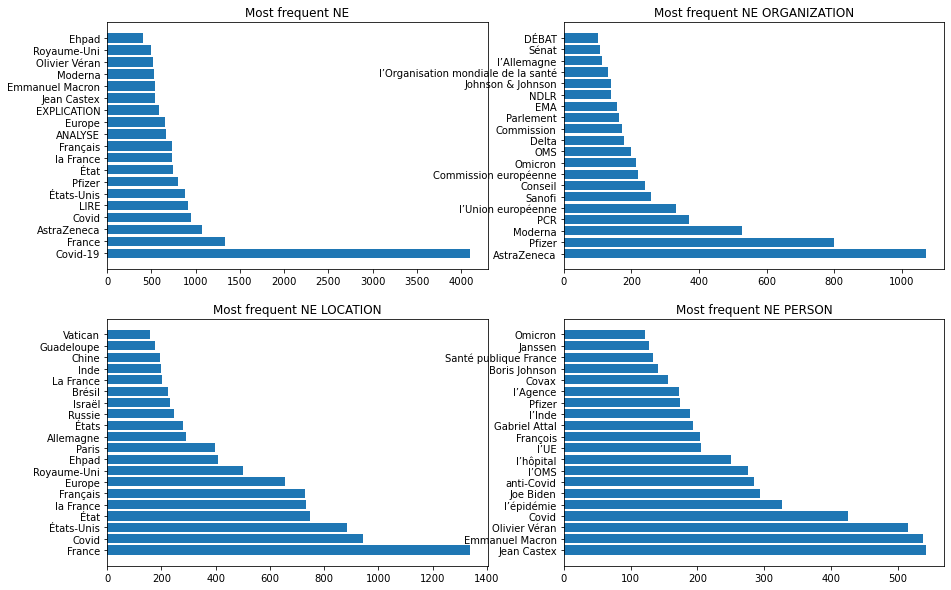

In [43]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')